In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


### Analyzing the dataset and searching for missing data

In [2]:
credit_card_df = pd.read_csv('creditcard.csv')

In [3]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_card_df[credit_card_df['Class']==0].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_df[credit_card_df['Class']==1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


### Analyzing correlation and class distribution

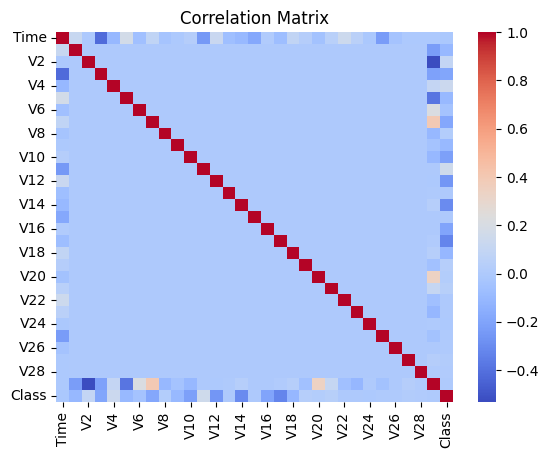

In [8]:
mat_corr = credit_card_df.corr()
sns.heatmap(data=mat_corr, fmt=".2f", linecolor='black', cmap='coolwarm')
plt.title("Correlation Matrix");

In [9]:
mat_corr.iloc[:, mat_corr.columns=='Class']

,Class
Time,-0.012323
V1,-0.101347
V2,0.091289
V3,-0.192961
V4,0.133447
V5,-0.094974
V6,-0.043643
V7,-0.187257
V8,0.019875
V9,-0.097733


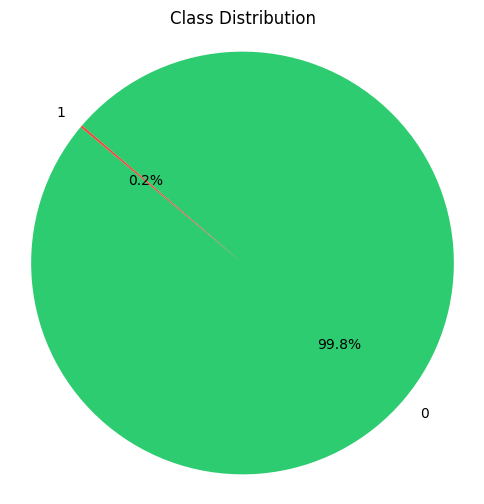

In [10]:
class_counts = credit_card_df['Class'].value_counts()

colors = ['#2ecc71', '#e74c3c']
plt.figure(figsize=(6,6))
plt.pie(x=class_counts, labels=class_counts.index, colors=colors, autopct="%.1f%%", startangle=140)
plt.title('Class Distribution')
plt.axis('equal');

#### Preprocessing the data

In [11]:
X = credit_card_df.iloc[:, 0:30]
y = credit_card_df.iloc[:, 30]
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [12]:
#correlations_with_class = mat_corr['Class'].abs()

#selected_features = correlations_with_class[correlations_with_class > 0.1].index.drop('Class')

#X = X[selected_features]

#### Standardizing the scale of data

In [13]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[["Time", "Amount"]] = scaler.fit_transform(X_scaled[["Time", "Amount"]])

In [14]:
X_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


### Separating data set into test and training and creating array of weights importance balancing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, shuffle=True, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [16]:
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)


In [17]:
sample_weights

array([0.50086612, 0.50086612, 0.50086612, ..., 0.50086612, 0.50086612,
       0.50086612], shape=(227845,))

### Model training, outcome metrics and cross-validation


In [18]:
def show_scores(model, y_test, y_predicted):
    print("Accuracy score:", round(accuracy_score(y_test, y_predicted), 2))
    print("Balanced Accuracy score:", round(balanced_accuracy_score(y_test, y_predicted), 2))

    print("Precision score:", round(precision_score(y_test, y_predicted, average="weighted"), 2))
    print("Recall score:", round(recall_score(y_test, y_predicted, average="weighted"), 2))
    print("F1 score:", round(f1_score(y_test, y_predicted, average="weighted"), 2))
    print("Average Precision score:", round(average_precision_score(y_test, y_predicted), 2))


    cross_score = cross_validate(estimator=model, X=X_scaled, y=y, cv=10, 
                                  scoring=['accuracy','balanced_accuracy','f1','precision','recall', 'average_precision'])
    
    print("=== Cross-validation Performance ===")
    print(f"Mean Cross-validation accuracy: {round(cross_score['test_accuracy'].mean(), 2)}")
    print(f"Cross-validation accuracy standard deviation: {round(cross_score['test_accuracy'].std(), 2)}")
    print(f"Mean Cross-validation balanced_accuracy: {round(cross_score['test_balanced_accuracy'].mean(), 2)}")
    print(f"Mean Cross-validation f1: {round(cross_score['test_f1'].mean(), 2)}")
    print(f"Mean Cross-validation precision: {round(cross_score['test_precision'].mean(), 2)}")
    print(f"Mean Cross-validation recall: {round(cross_score['test_recall'].mean(), 2)}")
    print(f"Mean Cross-validation average_precision: {round(cross_score['test_average_precision'].mean(), 2)}")


    cm = confusion_matrix(y_test, y_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix");

#### RandomForest

Accuracy score: 1.0
Balanced Accuracy score: 0.89
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Average Precision score: 0.74
=== Cross-validation Performance ===
Mean Cross-validation accuracy: 1.0
Cross-validation accuracy standard deviation: 0.0
Mean Cross-validation balanced_accuracy: 0.87
Mean Cross-validation f1: 0.79
Mean Cross-validation precision: 0.9
Mean Cross-validation recall: 0.73
Mean Cross-validation average_precision: 0.78


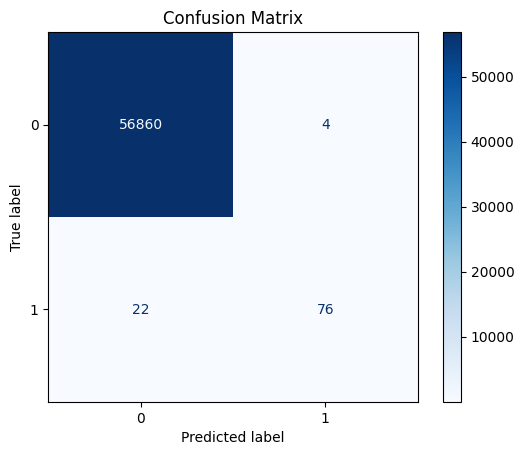

In [19]:
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", n_jobs=-1)
rf.fit(X_train, y_train, sample_weight=sample_weights)

y_rf_predicted = rf.predict(X_test)

show_scores(rf, y_test, y_rf_predicted)


#### Decision tree

Accuracy score: 1.0
Balanced Accuracy score: 0.85
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Average Precision score: 0.5
=== Cross-validation Performance ===
Mean Cross-validation accuracy: 0.9
Cross-validation accuracy standard deviation: 0.29
Mean Cross-validation balanced_accuracy: 0.8
Mean Cross-validation f1: 0.59
Mean Cross-validation precision: 0.6
Mean Cross-validation recall: 0.7
Mean Cross-validation average_precision: 0.41


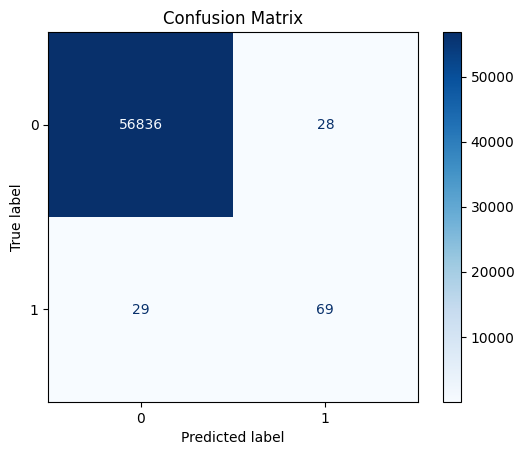

In [20]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

y_tree_predicted = decision_tree.predict(X_test)

show_scores(decision_tree, y_test, y_tree_predicted)

#### KNN

Accuracy score: 1.0
Balanced Accuracy score: 0.9
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Average Precision score: 0.75
=== Cross-validation Performance ===
Mean Cross-validation accuracy: 1.0
Cross-validation accuracy standard deviation: 0.0
Mean Cross-validation balanced_accuracy: 0.85
Mean Cross-validation f1: 0.77
Mean Cross-validation precision: 0.88
Mean Cross-validation recall: 0.7
Mean Cross-validation average_precision: 0.69


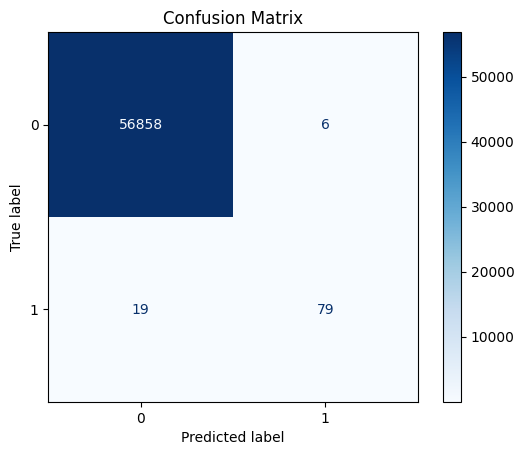

In [21]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance", n_jobs=-1)
knn.fit(X_train, y_train)
y_knn_predicted = knn.predict(X_test)

show_scores(knn, y_test, y_knn_predicted)